## Extinction Curves

Import

In [13]:
import numpy as np
from astropy.modeling.models import BlackBody
import astropy.units as u
import matplotlib.pyplot as plt
from dust_extinction.parameter_averages import G23
from dust_extinction.parameter_averages import F19
from dust_extinction.parameter_averages import F99
import sncosmo
import pandas as pd
from bayesn import SEDmodel

##Second program
import extinction

In [14]:
# wavelengths and spectrum are 1D arrays
# wavelengths between 1000 and 30000 A
wavelengths = np.logspace(np.log10(0.1), np.log10(10), num=1000)*u.micron
#wavelengths2 = np.logspace(np.log10(0.3), np.log10(3.0), num=1000)*u.micron
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
spectrum = bb_lam(wavelengths)

In [26]:
# define the model
supernova_name = "sn2002cv"
sampleSummaryDirG23 = "DustLawsFitOfAllSamples/"+supernova_name + "G23_fit_summary.csv"
samplesSummaryG23 = pd.read_csv(sampleSummaryDirG23)
samplesSummaryG23 = samplesSummaryG23.rename(index=samplesSummaryG23['Unnamed: 0'])
sampleSummaryDirF99 = "DustLawsFitOfAllSamples/"+supernova_name + "F99_fit_summary.csv"
samplesSummaryF99 = pd.read_csv(sampleSummaryDirF99)
samplesSummaryF99 = samplesSummaryF99.rename(index=samplesSummaryF99['Unnamed: 0'])
sampleSummaryDirF19 = "DustLawsFitOfAllSamples/"+supernova_name + "F19_fit_summary.csv"
samplesSummaryF19 = pd.read_csv(sampleSummaryDirF19)
samplesSummaryF19 = samplesSummaryF19.rename(index=samplesSummaryF19['Unnamed: 0'])
RVG23=samplesSummaryG23.loc['RV[0]', 'mean']
RVF19=samplesSummaryF19.loc['RV[0]', 'mean']
RVF99=samplesSummaryF99.loc['RV[0]', 'mean']
AVG23=samplesSummaryG23.loc['AV[0]', 'mean']
AVF19=samplesSummaryF19.loc['AV[0]', 'mean']
AVF99=samplesSummaryF99.loc['AV[0]', 'mean']
extG23 = G23(Rv=RVG23)
extF19 = F19(Rv=RVF19)
extF99 = F99(Rv=RVF99)

()


In [16]:
# unextinguish (deredden) the spectrum
# Av = 1.55 = R(V) * E(B-V) = 3.1 * 0.5
spectrum_extG23 = spectrum*extG23.extinguish(wavelengths, Av=AVG23)
spectrum_extF19 = spectrum*extF19.extinguish(wavelengths, Av=AVF19)
spectrum_extF99 = spectrum*extF99.extinguish(wavelengths, Av=AVF99)
print(spectrum_extG23.shape)

(1000,)


In [17]:
extAVG23 = AVG23*extG23(wavelengths)
extAVF19 = AVF19*extF19(wavelengths)
extAVF99 = AVF99*extF99(wavelengths)

In [18]:
#Sorting out frequency in each band
band_names = ["U", "B", "G", "g", "V", "R", "r", "I","i","z", "Z", "Y", "J", "H", "K", "L", "M", "N", "Q"]
mean_wavelength_per_band = [365, 445, 464, 464, 551, 658, 658, 806, 806, 893.2, 900, 1020, 1220, 1630, 2190, 3450, 4750, 10500, 21000]
print(len(band_names))
print(len(mean_wavelength_per_band))
data = {"Band": band_names,
  "Wavelength": mean_wavelength_per_band,
       "Frequency":np.zeros(len(band_names))}
band_wavelengths = pd.DataFrame(data)
print(band_wavelengths)

19
19
   Band  Wavelength  Frequency
0     U       365.0        0.0
1     B       445.0        0.0
2     G       464.0        0.0
3     g       464.0        0.0
4     V       551.0        0.0
5     R       658.0        0.0
6     r       658.0        0.0
7     I       806.0        0.0
8     i       806.0        0.0
9     z       893.2        0.0
10    Z       900.0        0.0
11    Y      1020.0        0.0
12    J      1220.0        0.0
13    H      1630.0        0.0
14    K      2190.0        0.0
15    L      3450.0        0.0
16    M      4750.0        0.0
17    N     10500.0        0.0
18    Q     21000.0        0.0


In [19]:
supernova_file = "/root/partiiiproject/Archive/"+supernova_name+".dat"
meta, lcdata = sncosmo.read_snana_ascii(supernova_file, default_tablename='OBS')
lcdata = lcdata['OBS'].to_pandas()
bands = np.unique(lcdata['FLT'])
for i, entry in lcdata.iterrows():
    entry_band = entry.FLT
    if entry_band[0] in band_names:
        entry_band_index =  band_names.index(entry_band[0])
        band_wavelengths.at[entry_band_index, 'Frequency'] = band_wavelengths.at[entry_band_index, 'Frequency'] + 1
    else:
        print(entry_band + " Not in our list")
print(band_wavelengths)

   Band  Wavelength  Frequency
0     U       365.0        0.0
1     B       445.0        0.0
2     G       464.0        0.0
3     g       464.0        0.0
4     V       551.0        0.0
5     R       658.0        9.0
6     r       658.0        0.0
7     I       806.0        7.0
8     i       806.0        0.0
9     z       893.2        0.0
10    Z       900.0        0.0
11    Y      1020.0        0.0
12    J      1220.0       17.0
13    H      1630.0       10.0
14    K      2190.0       17.0
15    L      3450.0        0.0
16    M      4750.0        0.0
17    N     10500.0        0.0
18    Q     21000.0        0.0


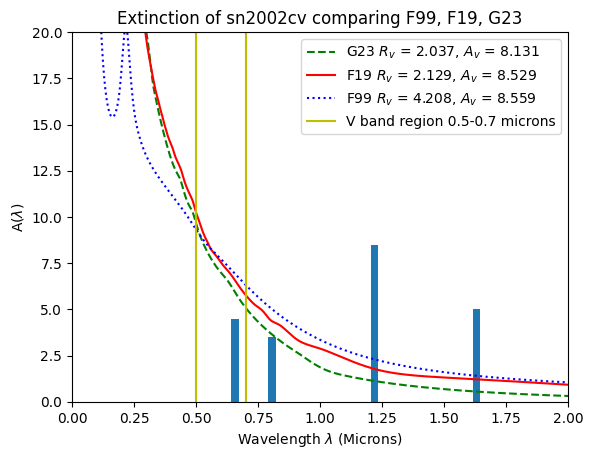

In [20]:
#plt.yscale("log")
#plt.xscale("log")

plt.xlabel(rf'Wavelength $\lambda$ (Microns)')
plt.ylabel(rf'A($\lambda$)')
plt.title('Extinction of '+ supernova_name +' comparing F99, F19, G23')
plt.plot(wavelengths, extAVG23, '--g', label = rf"G23 $R_v$ = {RVG23}, $A_v$ = {AVG23}")
plt.plot(wavelengths, extAVF19, '-r', label = rf"F19 $R_v$ = {RVF19}, $A_v$ = {AVF19}")
plt.plot(wavelengths, extAVF99,  ':b', label = rf"F99 $R_v$ = {RVF99}, $A_v$ = {AVF99}")
x_1 = np.linspace(0, 20, 1000)
plt.plot(x_1-x_1+0.5,x_1, 'y')
plt.plot(x_1-x_1+0.7,x_1, 'y', label = "V band region 0.5-0.7 microns")
#plt.plot(band_wavelengths["Wavelength"]/1000, band_wavelengths["Frequency"])
plt.bar(band_wavelengths["Wavelength"]/1000, band_wavelengths["Frequency"]/2, width=0.03, bottom=None, align='center')
plt.ylim(0,20)
plt.xlim(0,2)
plt.legend()
plt.savefig("/root/partiiiproject/ExtinctionCurvePlots/DustCurve"+supernova_name+".png", bbox_inches='tight') #save plot

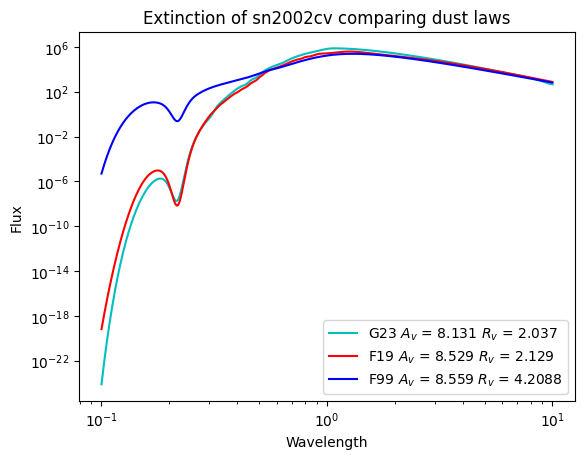

In [21]:
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.title('Extinction of '+supernova_name+' comparing dust laws')
plt.plot(wavelengths, spectrum_extG23, color = 'c', label = rf"G23 $A_v$ = {AVG23} $R_v$ = {RVG23}")
plt.plot(wavelengths, spectrum_extF19, 'r', label = rf"F19 $A_v$ = {AVF19} $R_v$ = {RVF19}")
plt.plot(wavelengths, spectrum_extF99,  'b', label = rf"F99 $A_v$ = {AVF99} $R_v$ = {RVF99}8")
plt.legend()

## Using BayeSN to plot

In [22]:
model = SEDmodel(load_model='W22_model', load_redlaw = 'F19')

Current devices: [CpuDevice(id=0), CpuDevice(id=1), CpuDevice(id=2), CpuDevice(id=3)]
Currently working in /root/partiiiproject
Loading built-in model W22_model
Loading built-in reddening law F19


In [23]:
supernova_file = "/root/partiiiproject/sn2009I.Wstd_snana.dat"
supernova_name = "sn2009I"
prior_distribution = "uniform"  #"uniform" "fixed" "normal2.5"
dust_law = "F19"
drop_bands=['u_CSP']
samples, sn_props = model.fit_from_file(supernova_file, RV='uniform', drop_bands=drop_bands, redlaw=dust_law)

[  77.35   70.09   55.11   51.32   47.39   56.61   51.14   60.27   99.7
   86.97   95.09   77.03   80.06  116.48  109.7    97.87   84.07   91.6
   58.83   60.03   52.34   71.77   89.2    93.03   67.56  102.8    78.56
   98.24  251.38  304.86  376.74  373.11  270.18  246.88  384.48  283.96
  276.9   285.59  349.81  352.29  439.56  504.7   426.81  370.58  665.34
 1026.49  481.01  477.82  785.73  714.71  873.05  990.66  855.5   868.2
 1744.97]
Loading built-in reddening law F19


/root/miniforge3/envs/bayesn/lib/python3.11/site-packages/bayesn/bayesn_model.py:2995: UserWarning: Missing a plate statement for batch dimension -2 at site 'obs'. You can use `numpyro.util.format_shapes` utility to check shapes at all sites of your model.
  mcmc.run(
sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [09:30<00:00,  1.14s/it]



                     mean       std    median      5.0%     95.0%     n_eff     r_hat
          AV[0]      1.76      0.13      1.77      1.56      1.98    214.42      1.02
          Ds[0]     35.05      0.12     35.04     34.87     35.25    228.52      1.02
          RV[0]      2.07      0.22      2.07      1.70      2.44    236.43      1.02
 eps_tform[0,0]      0.40      0.87      0.40     -0.96      1.77    821.76      1.00
 eps_tform[0,1]      0.33      0.67      0.31     -0.78      1.42   1179.31      1.00
 eps_tform[0,2]     -0.40      0.72     -0.43     -1.57      0.72   1087.09      1.00
 eps_tform[0,3]     -0.45      0.45     -0.48     -1.14      0.31    960.82      1.00
 eps_tform[0,4]      0.36      0.57      0.38     -0.58      1.29    788.05      1.00
 eps_tform[0,5]     -0.10      0.88     -0.11     -1.36      1.42    885.05      1.00
 eps_tform[0,6]     -0.13      0.45     -0.15     -0.89      0.56    646.63      1.00
 eps_tform[0,7]     -0.24      0.44     -0.26     -0.

In [24]:
AV = 1.90
RV = 1.61
z=model._load_redlaw('F19')
print(z)
y=z.get_axav(RV)[0]
plt.plot(model.model_wave, AV*y)

Loading built-in reddening law F19
None


AttributeError: 'NoneType' object has no attribute 'get_axav'